#Import Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn import svm #SVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #roc score

#Import warnings untuk menghilangkan pesan peringatan
import warnings
warnings.filterwarnings("ignore")

*   Library **pandas** untuk memproses data meliputi pembersihan, analisis, manipulasi, dan lain-lain.
*   Library **numpy** untuk memproses array.
*   Library **seaborn** adalah data visualization berdasarkan matplotlib.
*   Library **matplotlib.pyplot** adalah sebuah library untuk membuat visualisasi yang statis, animatif, dan interaktif.
* Library **sklearn** adalah library untuk membangun model machine learning yang menyediakan banyak algoritma pembelajaran untuk regresi, pengelompokan, dan klasifikasi.
*   Library **warnings >> warnings.filterwarnings('ignore')**  untuk mengabaikan warning messages.

# Import Data

Dataset yang digunakan adalah data train dari data [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data) yang diunggah terlebih dahulu ke Google Drive pada folder `home credit dataset`. Import data dari file CSV dengan menggunakan code: `train_data = pd.read_csv('application_train.csv')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = '/content/drive/MyDrive/home credit dataset'
os.chdir(path)

In [ ]:
# Import Data

# dataset utama
train_data = pd.read_csv('application_train.csv')
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Understanding

In [ ]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Cek ukuran
print('Ukuran dari train_data :',train_data.shape)

Ukuran dari train_data : (307511, 122)


Berdasarkan output tersebut, dataset train House Prices terdiri atas **307511 baris** dan **122 kolom**.

In [ ]:
train_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

`train_data.columns.values` digunakan untuk melihat nama-nama kolom dari dataset.

In [ ]:
# cek duplikat data
train_data[train_data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Cek duplikat data dengan code `train_data[train_data.duplicated()]` dan berdasarkan output tersebut dapat diketahui bahwa tidak ada data yang terduplikat.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Berdasarkan output tersebut, dapat diketahui terdapat **307511 baris**, **122 kolom**, **65 data bertipe float64**, **41 data bertipe int64**, dan **16 data bertipe object**.

In [ ]:
# Memisahkan kolom-kolom kategorikal dan numerik
cats = train_data.select_dtypes(include=["object"])
nums = train_data.select_dtypes(include=[np.number])

# Menampilkan hasil
print("Kolom Kategorikal:")
print(cats.columns)
print("\nKolom Numerik:")
print(nums.columns)

Kolom Kategorikal:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

Kolom Numerik:
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


Setiap kolom pada dataset akan dibagi menjadi numerik dan kategorik. Hal ini dapat memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis.

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train_data[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

`train_data[col].value_counts()` digunakan untuk menghitung nilai unique values pada variabel kategorik. Terdapat unique value yang kurang relevan dengan variabel data:
1. Terdapat unique XNA pada Variabel `"CODE_GENDER"`
2. Terdapat unique Unknown pada Variabel `"NAME_FAMILY_STATUS"`

Adanya unique value yang tidak relevan dengan informasi variabel dapat membuat hasil analisis kurang valid sehingga perlu dilakukan identifikasi penyebabnya.


# Data Preparation

In [ ]:
#Melakukan cek missing value pada data
train_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [ ]:
#Melihat persentase data yang missing
total1 = train_data.isnull().sum().sort_values(ascending = False)
percent1 = (train_data.isnull().sum() / len(train_data) * 100).sort_values(ascending = False)
missing_train_data = pd.concat([percent1, total1], axis=1, keys=['Percent Miss', 'Total Miss'])
print('Total data semua :', train_data.shape[0])
missing_train_data.head(22)

Total data semua : 307511


,Percent Miss,Total Miss
COMMONAREA_MEDI,69.872297,214865
COMMONAREA_AVG,69.872297,214865
COMMONAREA_MODE,69.872297,214865
NONLIVINGAPARTMENTS_MODE,69.432963,213514
NONLIVINGAPARTMENTS_AVG,69.432963,213514
NONLIVINGAPARTMENTS_MEDI,69.432963,213514
FONDKAPREMONT_MODE,68.386172,210295
LIVINGAPARTMENTS_MODE,68.354953,210199
LIVINGAPARTMENTS_AVG,68.354953,210199
LIVINGAPARTMENTS_MEDI,68.354953,210199


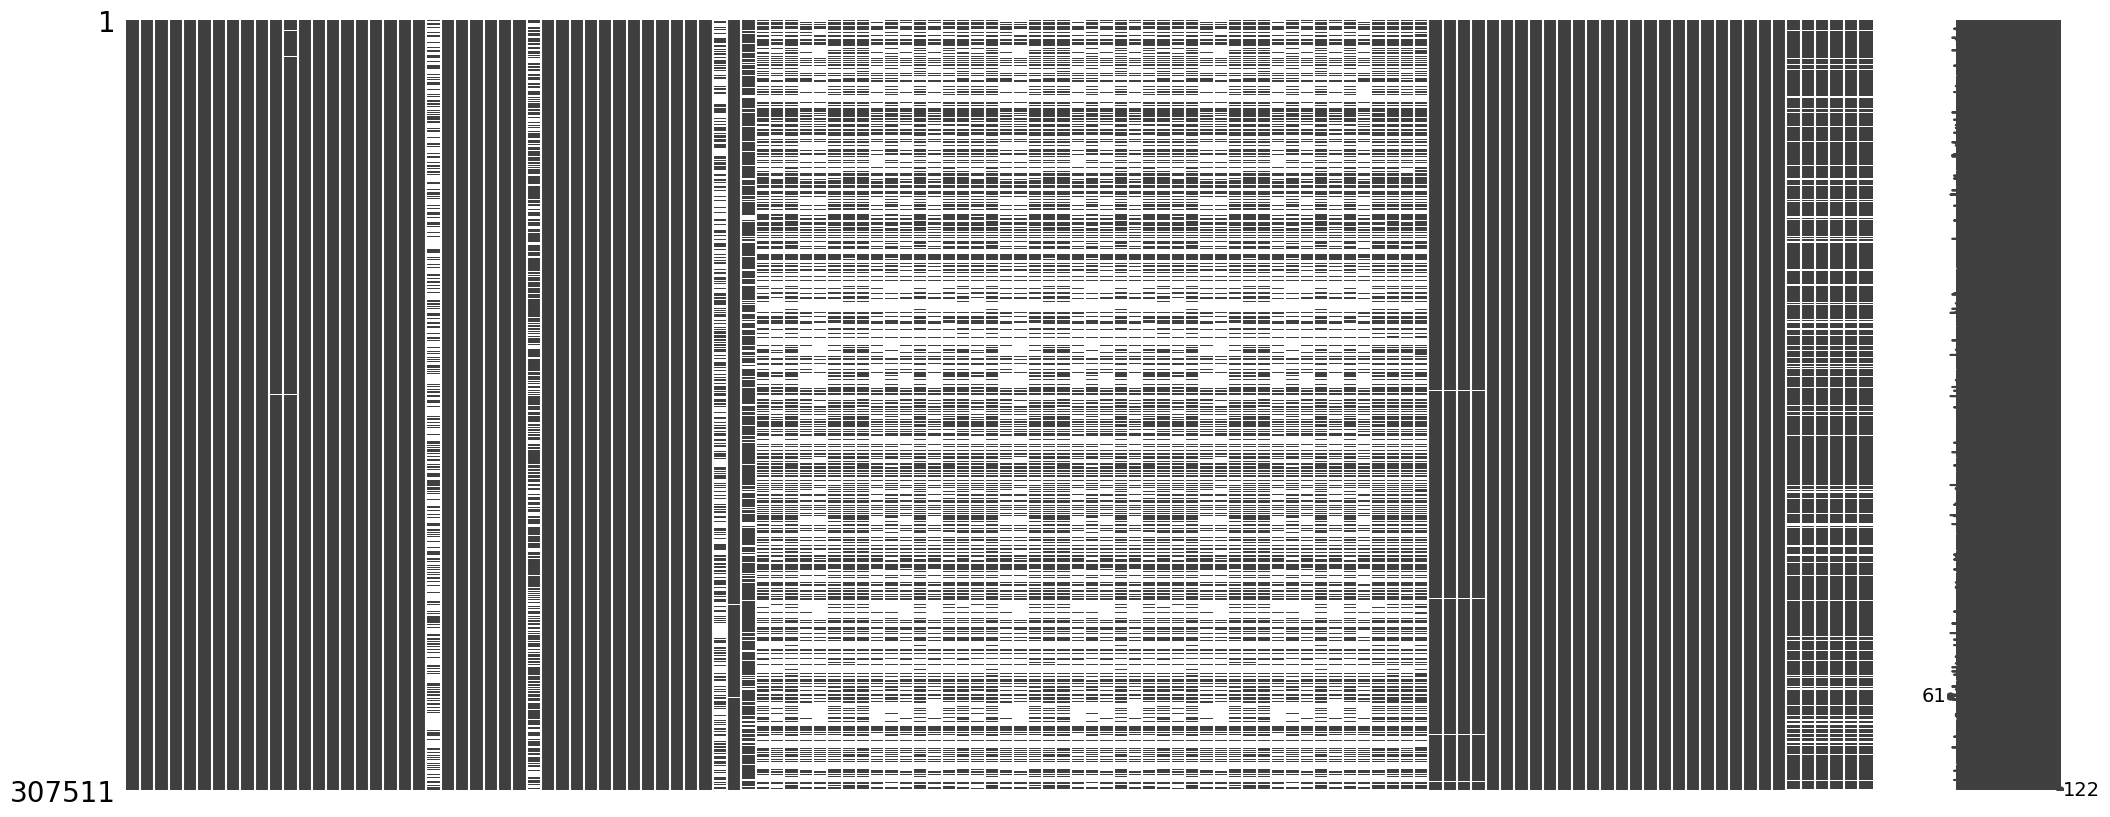

In [ ]:
#Missing Value Visualization
msno.matrix(train_data)
plt.show()

Berdasarkan output tersebut, diperoleh jumlah missing value masing-masing kolom dengan variabel `COMMONAREA_MEDI`, `COMMONAREA_AVG`, `COMMONAREA_MODE` memiliki missing value terbanyak yaitu 214865.

## Handling Missing Value

In [ ]:
# menghapus row berdasarkan CODE_GENDER = XNA dan NAME_FAMILY_STATUS = unknown
train_data.drop(train_data.loc[train_data['CODE_GENDER']== 'XNA'].index, inplace=True)
train_data.drop(train_data.loc[train_data['NAME_FAMILY_STATUS']=='Unknown'].index, inplace=True)

# menentukan kolom-kolom yang akan dihapus
columns_to_drop = missing_train_data[percent1 > 50].index

# menghapus kolom-kolom yang telah ditentukan
train_data.drop(columns=columns_to_drop, inplace=True)

Nilai XNA pada kolom `'CODE_GENDER'` dan nilai Unknown pada kolom `'NAME_FAMILY_STATUS'` tidak dipengaruhi oleh kolom lain karena tidak ada pola keterikatan tertentu antara unique value tersebut dengan unique value dari kolom lain sehingga kemungkinan disebabkan oleh human error. Dengan demikian, dapat dihandling dengan menghapus baris karena jumlah unique value tersebut hanya sedikit maka tidak memiliki pengaruh signifikan terhadap hasil analisis. Kemudian, pada variabel dengan persentase jumlah missing value lebih dari 50% dapat dilakukan metode penanganan dengan metode dropping.

In [ ]:
# Setelah di drop
total11 = train_data.isnull().sum().sort_values(ascending = False)
percent11 = (train_data.isnull().sum() / len(train_data) * 100).sort_values(ascending = False)
missing_train_data_2 = pd.concat([percent11, total11], axis=1, keys=['Percent Miss', 'Total Miss'])
print('Total data semua :', train_data.shape[0])
missing_train_data_2.head(22)

Total data semua : 307505


,Percent Miss,Total Miss
FLOORSMAX_AVG,49.761142,153018
FLOORSMAX_MODE,49.761142,153018
FLOORSMAX_MEDI,49.761142,153018
YEARS_BEGINEXPLUATATION_AVG,48.781321,150005
YEARS_BEGINEXPLUATATION_MODE,48.781321,150005
YEARS_BEGINEXPLUATATION_MEDI,48.781321,150005
TOTALAREA_MODE,48.268809,148429
EMERGENCYSTATE_MODE,47.398579,145753
OCCUPATION_TYPE,31.345507,96389
EXT_SOURCE_3,19.825369,60964


In [ ]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307505.000000,307505.000000,307505.00000,3.075050e+05,3.075050e+05,307493.000000,3.072290e+05,307505.000000,307505.000000,307505.000000,...,307505.000000,307505.000000,307505.000000,307505.000000,265987.000000,265987.000000,265987.000000,265987.000000,265987.000000,265987.000000
mean,278181.821811,0.080730,0.41705,1.687967e+05,5.990284e+05,27108.638224,5.383977e+05,0.020868,-16037.049495,63816.348794,...,0.008130,0.000595,0.000507,0.000335,0.006403,0.007000,0.034363,0.267389,0.265475,1.899954
std,102790.177600,0.272421,0.72212,2.371248e+05,4.024939e+05,14493.840051,3.694472e+05,0.013831,4363.987877,141276.836143,...,0.089799,0.024388,0.022518,0.018299,0.083850,0.110758,0.204687,0.915995,0.794061,1.869288
min,100002.000000,0.000000,0.00000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189147.000000,0.000000,0.00000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278203.000000,0.000000,0.00000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367144.000000,0.000000,1.00000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
#Mengisi missing value pada kolom data kategorik dan numerik
#Untuk kolom kategorik, missing value diisi dengan mode
#Untuk kolom numerik, missing value diisi dengan median

for column in train_data:
  if train_data[column].isnull().any():
    if (column in cats):
      train_data[column]=train_data[column].fillna(train_data[column].mode()[0])
    else:
      train_data[column]=train_data[column].fillna(train_data[column].median())

train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Setelah variabel dengan persentase jumlah missing value lebih dari 50% dihapus, dapat dilakukan metode penanganan Missing Value untuk variabel yang persentase jumlah missing valuenya kurang dari 50% dengan metode fillna. Pada variabel yang memiliki persentase jumlah missing value lebih dari 50%, untuk variabel kategorik diisi dengan Nilai Modus dan variabel numerik diisi dengan Nilai Median.

In [ ]:
#Melakukan cek missing value pada data
train_data.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                    0
EXT_SOURCE_3                  0
FLAG_DOCUMENT_6               0
FLAG_DOCUMENT_5               0
FLAG_DOCUMENT_4               0
                             ..
FLAG_EMAIL                    0
FLAG_PHONE                    0
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

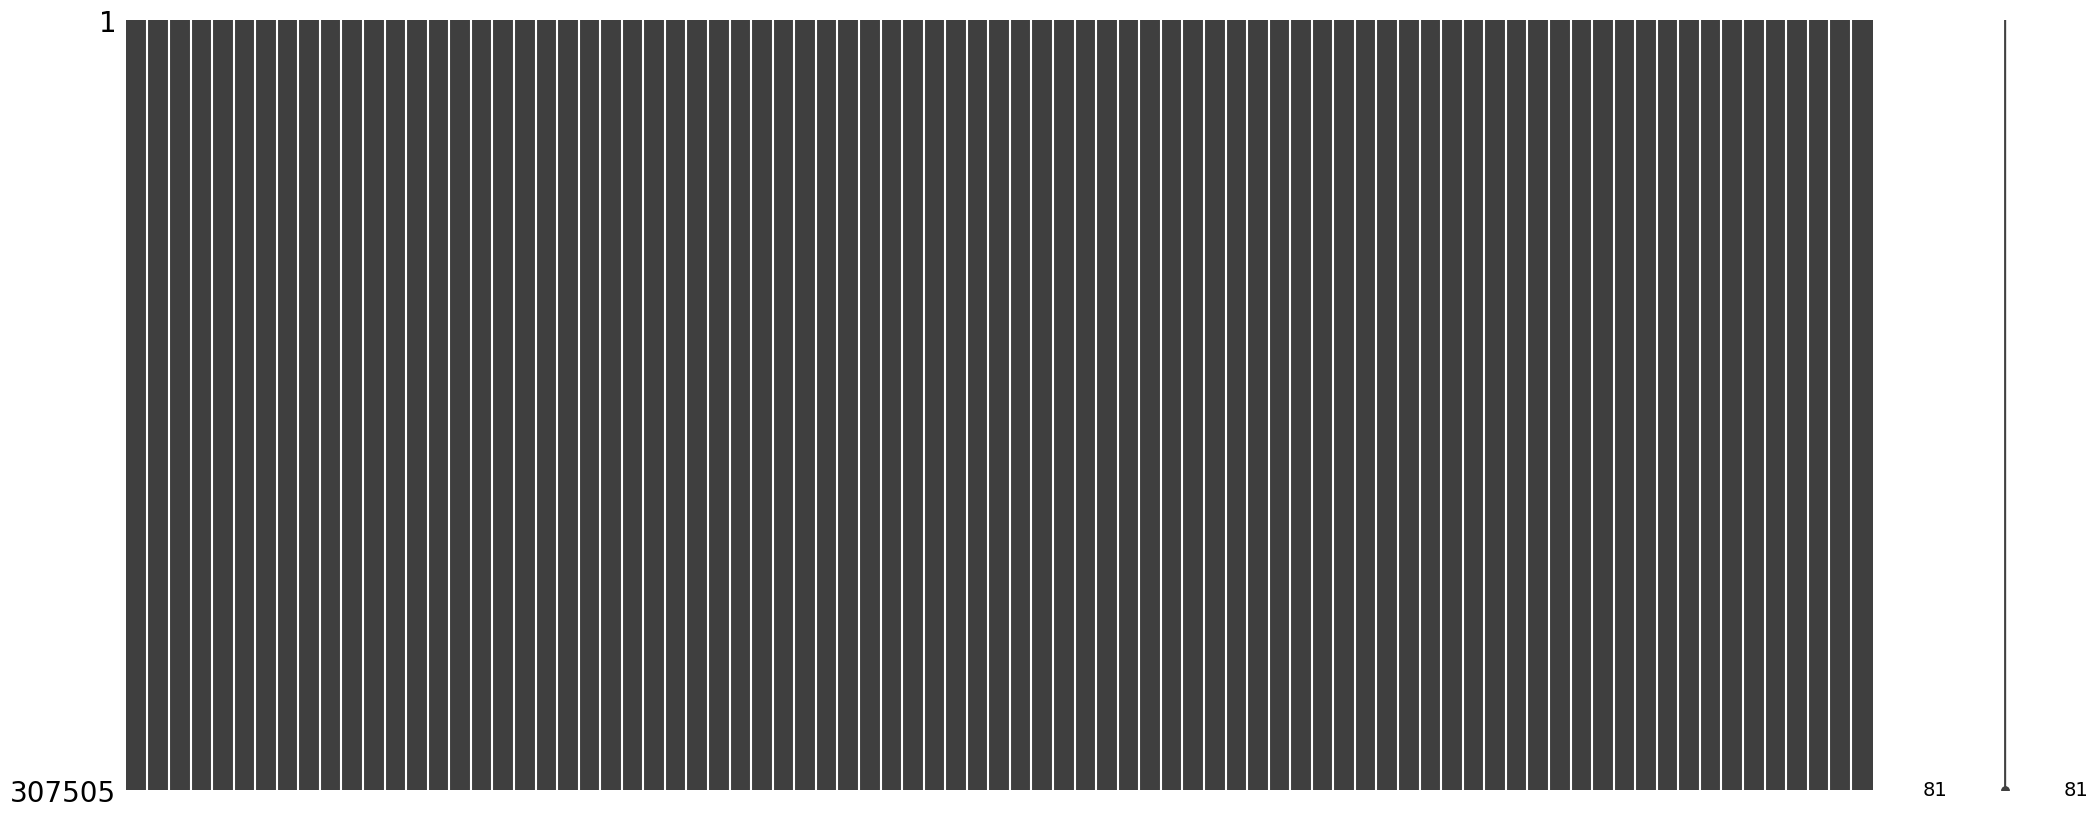

In [ ]:
#Missing Value Visualization
msno.matrix(train_data)
plt.show()

Setelah dilakukan penanganan missing value menggunakan metode dropna dan fillna, dapat terlihat bahwa sudah tidak ada missing value pada dataset.

## Cek Imbalance pada Data

In [ ]:
# untuk menampilkan informasi pada variabel target
train_data['TARGET'].value_counts()

0    282680
1     24825
Name: TARGET, dtype: int64

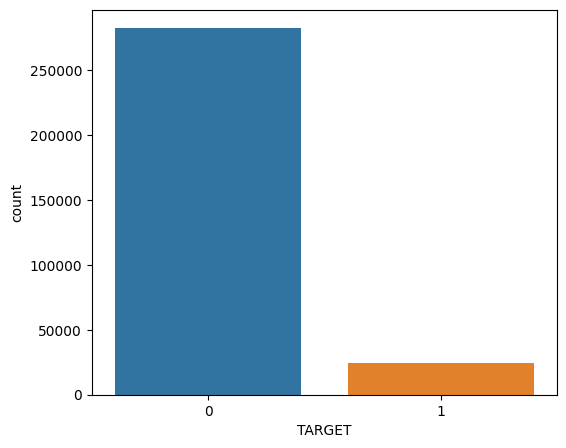

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x=train_data.TARGET);

Dari hasil value count dan count plot di atas, dapat terlihat bahwa data pada variabel target tidak seimbang dan terjadi ketimpangan.

1. Untuk variabel dengan target==1 (membayar tepat jatuh temponya) sebanyak 282686 orang.
2. Untuk variabel dengan target==0 (tidak bisa membayar tepat jatuh tempo) sebanyak 24825 orang.

## Cek Outliers dan Anomalies

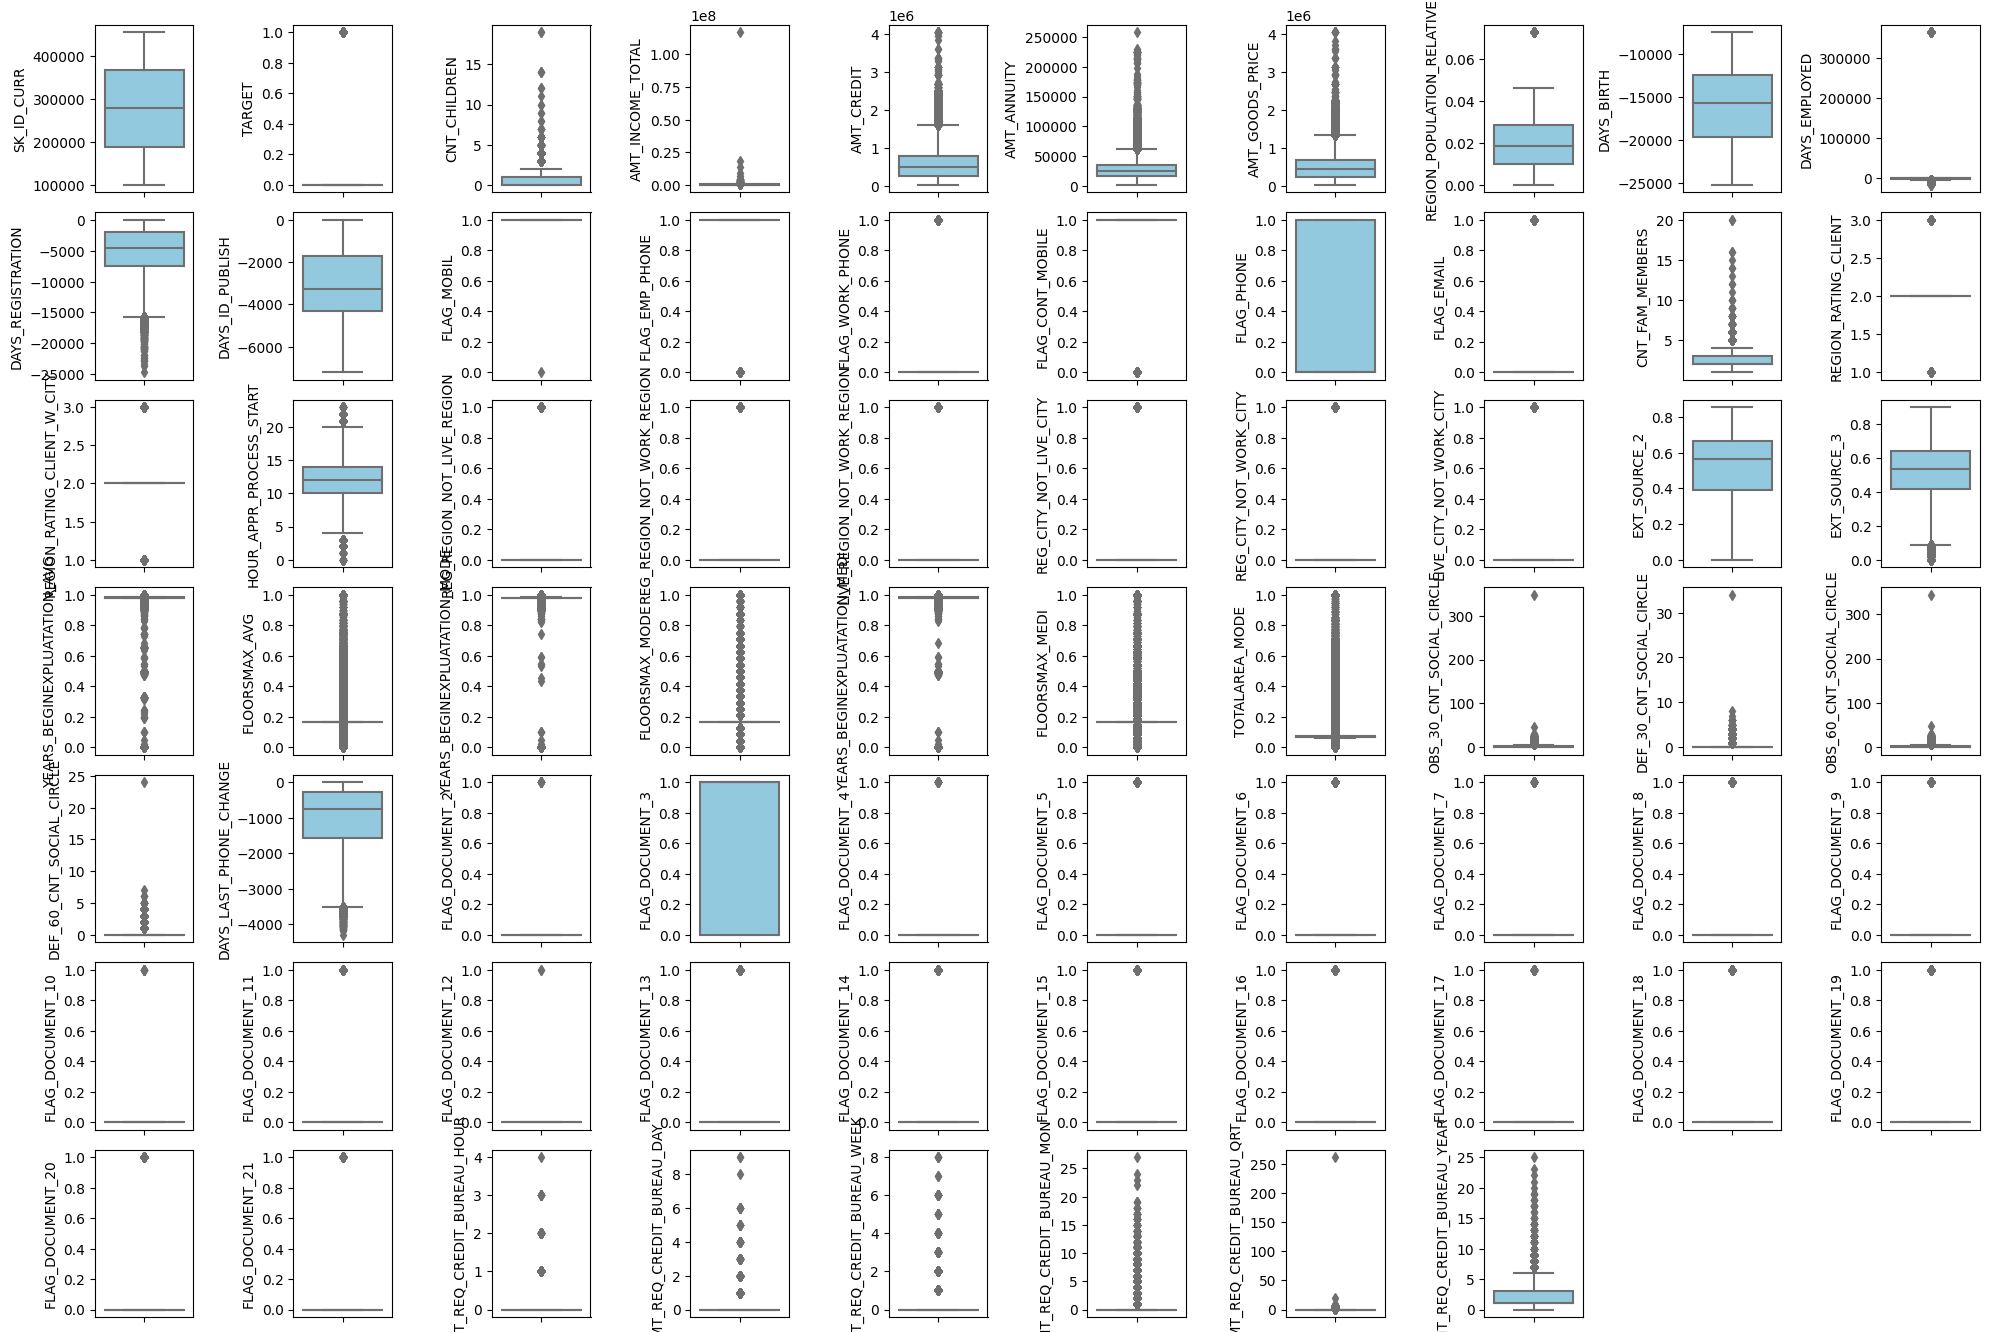

In [ ]:
# Menampilkan boxplot untuk variabel yang termasuk dalam variabel numerik
numerics=[i for i in train_data.columns if train_data[i].dtypes != 'object']
plt.figure(figsize=(20,19))
for i in range(0, len(numerics)):
    plt.subplot(10, 10, i+1)
    sns.boxplot(y=train_data[numerics[i]], color='skyblue', orient='v')
    plt.tight_layout()

In [ ]:
nums2 = train_data.select_dtypes(include=[np.number]).columns

# Menghitung jumlah outlier pada kolom numerik
numeric_outliers = {}
for column in nums2:
    q1 = train_data[column].quantile(0.25)
    q3 = train_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    numeric_outliers[column] = len(outliers)

print("Jumlah outlier pada kolom numerik:")
numeric_outliers

Jumlah outlier pada kolom numerik:


{'SK_ID_CURR': 0,
 'TARGET': 24825,
 'CNT_CHILDREN': 4272,
 'AMT_INCOME_TOTAL': 14034,
 'AMT_CREDIT': 6562,
 'AMT_ANNUITY': 7504,
 'AMT_GOODS_PRICE': 14728,
 'REGION_POPULATION_RELATIVE': 8412,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 72216,
 'DAYS_REGISTRATION': 659,
 'DAYS_ID_PUBLISH': 0,
 'FLAG_MOBIL': 1,
 'FLAG_EMP_PHONE': 55386,
 'FLAG_WORK_PHONE': 61303,
 'FLAG_CONT_MOBILE': 574,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 17442,
 'CNT_FAM_MEMBERS': 4007,
 'REGION_RATING_CLIENT': 80526,
 'REGION_RATING_CLIENT_W_CITY': 78026,
 'HOUR_APPR_PROCESS_START': 2257,
 'REG_REGION_NOT_LIVE_REGION': 4657,
 'REG_REGION_NOT_WORK_REGION': 15611,
 'LIVE_REGION_NOT_WORK_REGION': 12502,
 'REG_CITY_NOT_LIVE_CITY': 24039,
 'REG_CITY_NOT_WORK_CITY': 70866,
 'LIVE_CITY_NOT_WORK_CITY': 55214,
 'EXT_SOURCE_2': 0,
 'EXT_SOURCE_3': 4312,
 'YEARS_BEGINEXPLUATATION_AVG': 142013,
 'FLOORSMAX_AVG': 92613,
 'YEARS_BEGINEXPLUATATION_MODE': 141858,
 'FLOORSMAX_MODE': 88938,
 'YEARS_BEGINEXPLUATATION_MEDI': 142138,
 'FLOORSMAX_

In [ ]:
cats2 = train_data.select_dtypes(include=[np.object]).columns

# Menghitung jumlah outlier pada kolom kategorikal
categorical_outliers = {}
for column in cats2:
    counts = train_data[column].value_counts()
    outliers = counts[counts < 10]
    categorical_outliers[column] = len(outliers)

print("\nJumlah outlier pada kolom kategorikal:")
categorical_outliers


Jumlah outlier pada kolom kategorikal:


{'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'NAME_TYPE_SUITE': 0,
 'NAME_INCOME_TYPE': 1,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'OCCUPATION_TYPE': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'ORGANIZATION_TYPE': 0,
 'EMERGENCYSTATE_MODE': 0}

Berdasarkan output tersebut, terdapat beberapa data yang mengandung outliers karena terdapat titik-titik yang berada di luar batas atas dan batas bawah.

# Exploratory Data Analysis (EDA)

In [ ]:
# mendefinisikan fungsi untuk memvisualisasikan hasil statistik
def p_stats(feature,label_rotation=False,horizontal_layout=True):
# menggunakan variabel 'temp' untuk membaca multiple files
    temp = train_data[feature].value_counts()
# mendefinisikan df1 sebagai dataframe
    df = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

# menghitung persentase TARGET=1 pada tiap nilai kategori
    cat_perc = train_data [[feature, 'TARGET']].groupby([feature],as_index=False).mean()
# menggunakan 'sort_value' untuk mengurutkan nilai dalam dataframe berdasarkan 'TARGET'
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

# membuat conditional statement untuk mempermudah dalam pembuatan plot
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

## Type Contract

In [ ]:

ax = train_data.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan tipe kontrak')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan tipe kontrak


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
2,Revolving loans,0,27669
1,Cash loans,1,23221
3,Revolving loans,1,1604


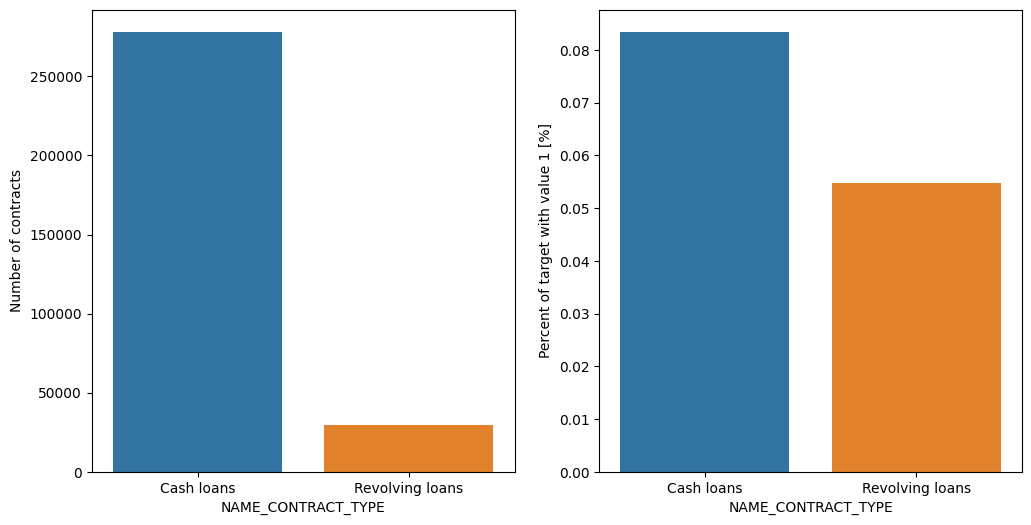

In [ ]:
p_stats('NAME_CONTRACT_TYPE')

In [ ]:
mylabels = ["Cash loans (0)", "Revolving loans (0)", "Cash loans (1)", "Revolving loans (1)"]
myexplode = [0, 0, 0, 0]
colors = ( "darkred", "red", "orangered", "orange")

In [ ]:
def func(pct):
  return "{:1.1f}%".format(pct)

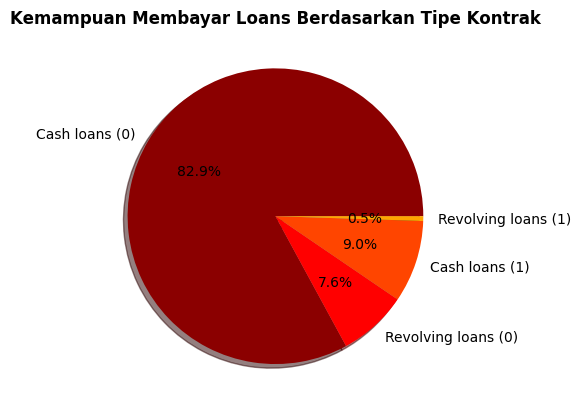

In [ ]:
plt.title("Kemampuan Membayar Loans Berdasarkan Tipe Kontrak", fontsize=12, weight="bold")
plt.pie(ax['SK_ID_CURR'], labels = mylabels, autopct=lambda pct: func(pct),
        explode = myexplode, colors=colors, shadow=True)
labels = ["0 = ", "1="]
plt.show()

Berdasarkan output tersebut, peminjam dengan type pinjaman Cash lebih banyak jumlahnya dibandingkan dengan Revolving.


## Gender

In [ ]:
ax = train_data.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan Gender')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188277
2,M,0,94403
1,F,1,14170
3,M,1,10655


In [ ]:
mylabels = ["Female target 0", "Male target 0", "Female target 1", "Male target 1"]
myexplode = [0, 0, 0, 0.3]
colors = ( "darkblue", "cyan", "royalblue", "lightblue")

In [ ]:
def func(pct):
  return "{:1.1f}%".format(pct)

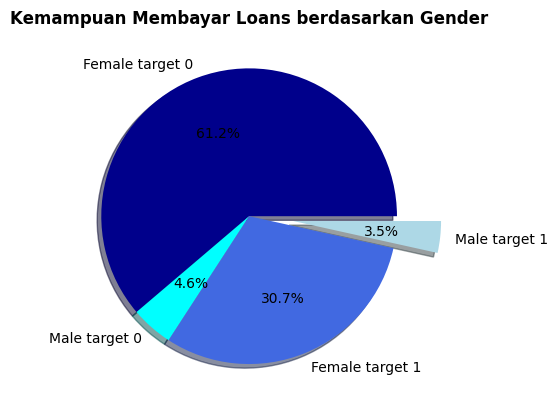

In [ ]:
plt.title("Kemampuan Membayar Loans berdasarkan Gender", fontsize=12, weight="bold")
plt.pie(ax['SK_ID_CURR'], labels = mylabels, autopct=lambda pct: func(pct),
        explode = myexplode, colors=colors, shadow=True)
plt.show()

Berdasarkan output tersebut, peminjam dengan Gender Female lebih banyak jumlahnya dibandingkan dengan Gender Male.

## Income Type

In [ ]:
ax = train_data.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan Pendapatan')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan Pendapatan


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,0,143547
1,Commercial associate,0,66254
5,Pensioner,0,52380
7,State servant,0,20454
13,Working,1,15224
2,Commercial associate,1,5360
6,Pensioner,1,2982
8,State servant,1,1249
9,Student,0,18
10,Unemployed,0,14


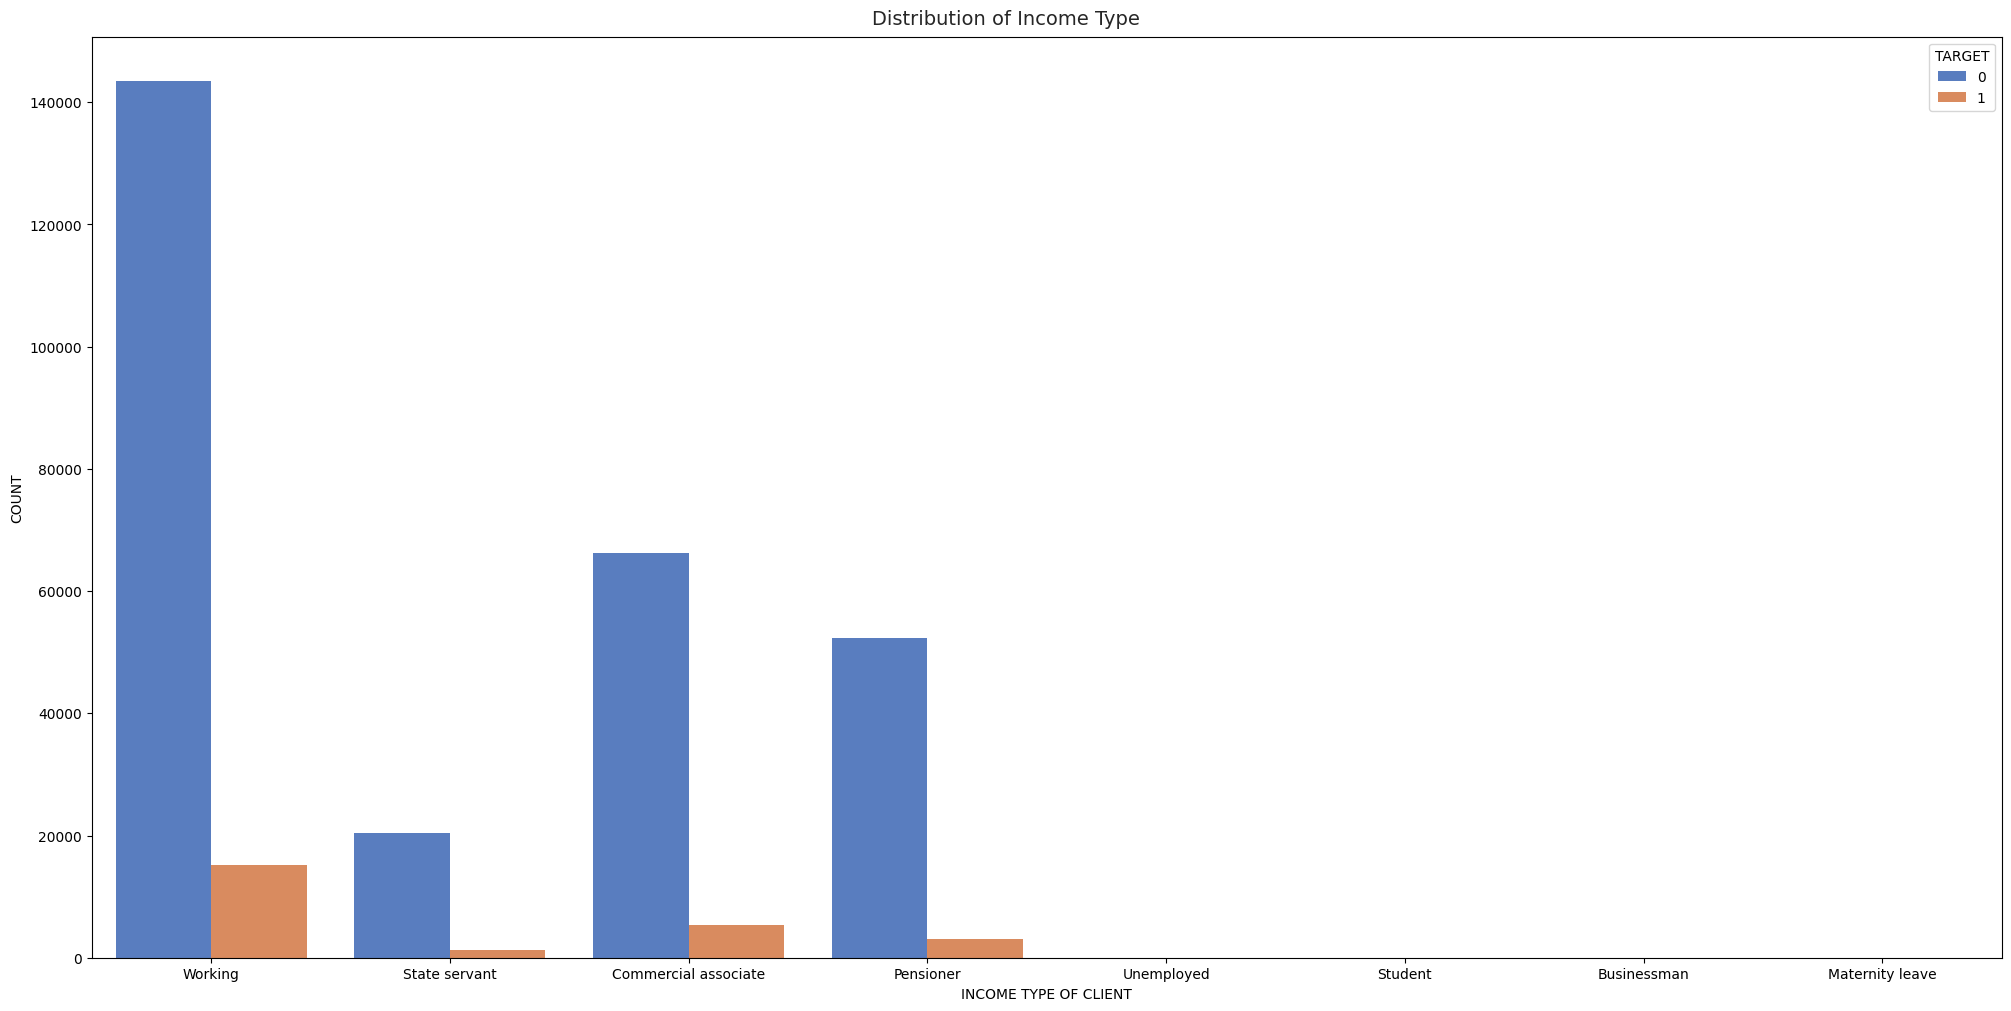

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=train_data, x='NAME_INCOME_TYPE', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('INCOME TYPE OF CLIENT')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Income Type', fontsize=14)
plt.show()

Dari plot diatas terlihat bahwa jumlah peminjam dengan Income Type Working (bekerja) adalah peminjam terbanyak dengan persentase sebesar > 10 %. Sedangkan peminjam terkecil adalah peminjam dengan status Maternity Leave (Cuti Hamil).


## Education Type

In [ ]:
ax = train_data.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan Pendidikan')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan Pendidikan


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,0,198865
2,Higher education,0,70852
9,Secondary / secondary special,1,19524
4,Incomplete higher,0,9404
3,Higher education,1,4009
6,Lower secondary,0,3398
5,Incomplete higher,1,872
7,Lower secondary,1,417
0,Academic degree,0,161
1,Academic degree,1,3


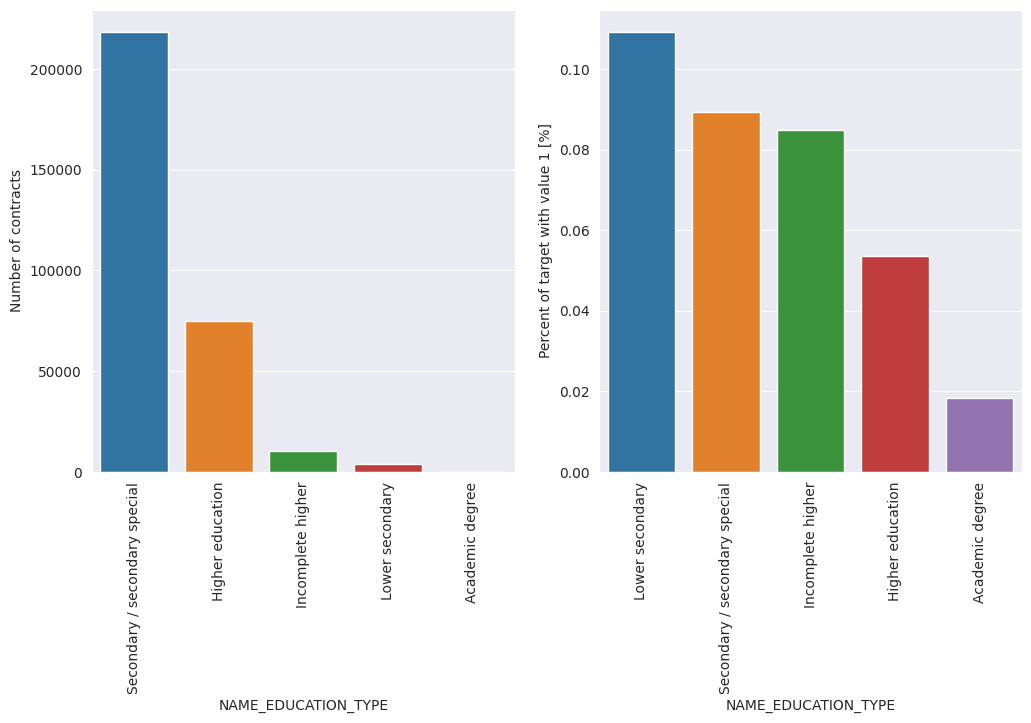

In [ ]:
p_stats('NAME_EDUCATION_TYPE',True ,True)

Dari plot diatas terlihat bahwa jumlah peminjam dengan tingkat pendidikan secondary/secondary special adalah peminjam terbanyak sedangkan peminjam terkecil adalah peminjam dengan tingkat pendidikan Lower secondary.
Untuk prosentase target==1, Lower secondary menunjukkan prosentase terbanyak yaitu > 10%.

## Family Status

In [ ]:
ax = train_data.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan Status Keluarga')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan Status Keluarga


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,0,181579
6,Single / not married,0,40987
0,Civil marriage,0,26813
4,Separated,0,18150
8,Widow,0,15151
3,Married,1,14850
7,Single / not married,1,4457
1,Civil marriage,1,2961
5,Separated,1,1620
9,Widow,1,937


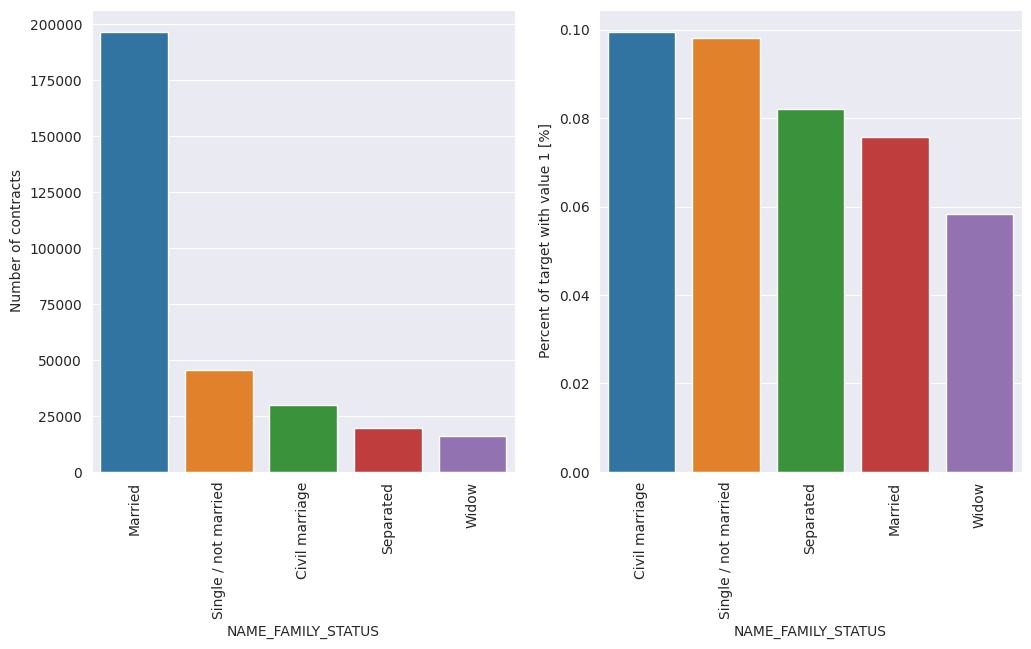

In [ ]:
p_stats('NAME_FAMILY_STATUS', True)

Dari plot diatas terlihat bahwa jumlah peminjam dengan status married (menikah) adalah peminjam terbanyak sedangkan peminjam terkecil adalah peminjam dengan status widow (janda).
Untuk prosentase target==1, civil marriage menunjukkan prosentase terbanyak yaitu < 10%, kemudian diikuti single dengan prosentase yang tidak beda jauh dengan civil marriage.

## Housing Type

In [ ]:
ax = train_data.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan Type Rumah')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan Type Rumah


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,0,251592
3,House / apartment,1,21272
10,With parents,0,13104
4,Municipal apartment,0,10226
8,Rented apartment,0,4280
6,Office apartment,0,2445
11,With parents,1,1736
0,Co-op apartment,0,1033
5,Municipal apartment,1,955
9,Rented apartment,1,601


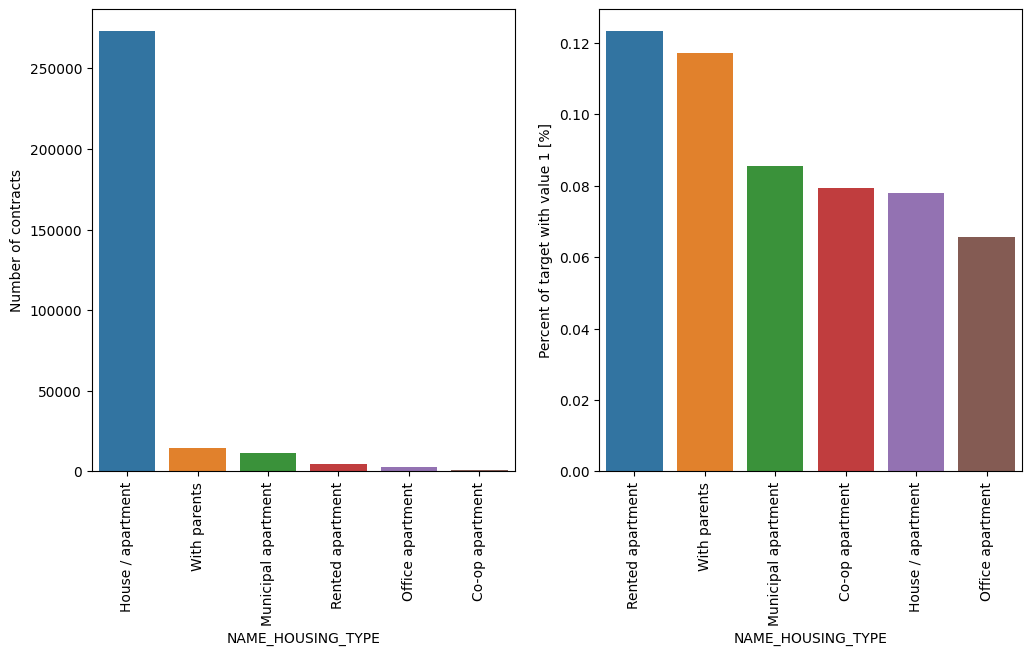

In [ ]:
p_stats('NAME_HOUSING_TYPE', True)

Berdasarkan plot di atas, terlihat bahwa jumlah peminjam dengan tipe rumah / apartemen adalah peminjam terbanyak sedangkan peminjam terendah adalah peminjam dengan tipe apartement kooperatif.

## Occupation Type

In [ ]:
ax = train_data.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Membayar Loans berdasarkan tipe pekerjaan')
ax.sort_values(by='SK_ID_CURR', ascending=False)

Kemampuan Membayar Loans berdasarkan tipe pekerjaan


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,0,139459
28,Sales staff,0,29010
6,Core staff,0,25831
20,Managers,0,20042
8,Drivers,0,16496
17,Laborers,1,12116
12,High skill tech staff,0,10679
0,Accountants,0,9338
22,Medicine staff,0,7965
32,Security staff,0,5999


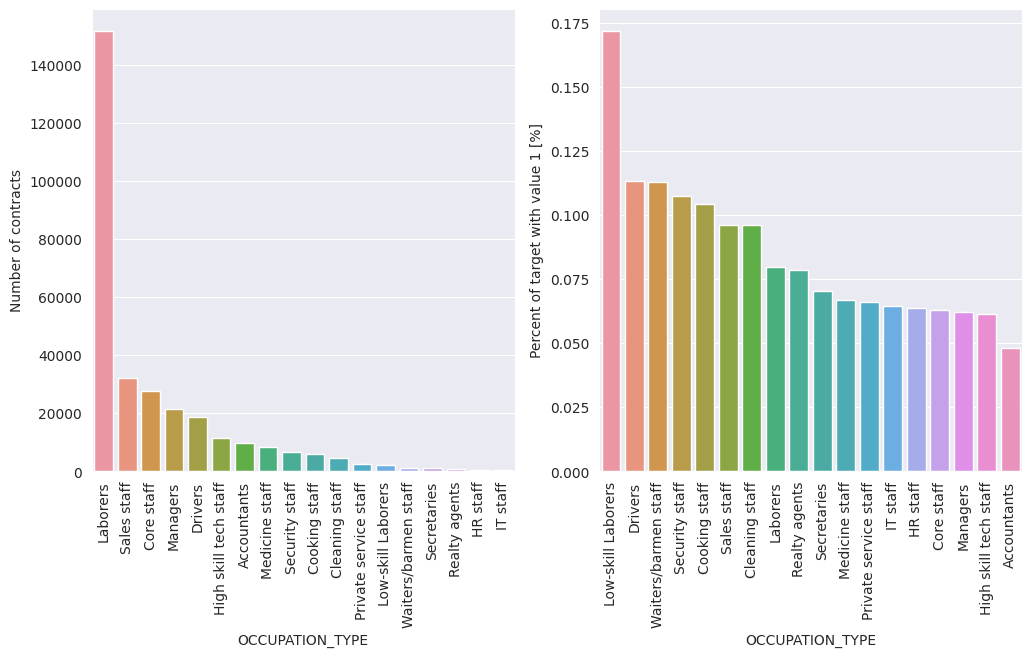

In [ ]:
p_stats('OCCUPATION_TYPE', True)

Dari plot diatas terlihat bahwa jumlah peminjam dengan tingkat pendidikan secondary/secondary specialpekerjaan sebagai karyawan adalah peminjam terbanyak sedangkan peminjam terkecil adalah peminjam yang bekerja sebagai Staff IT.
Untuk prosentase target==1, Karyawan low-skill menunjukkan prosentase terbanyak yaitu < 17,5%. Sedangkan prosentase terendah untuk target==1 adalah pekerja accountans, sehingga dimungkinkan lebih aman jika memberikan pinjaman ke pada pekerja akuntan.

## Distribusi Kredit

In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'AMT_CREDIT' dalam DataFrame yang disimpan dalam variabel train_data.
train_data['AMT_CREDIT'].min(),train_data['AMT_CREDIT'].max()

(45000.0, 4050000.0)

In [ ]:
credit_data = train_data[['TARGET', 'AMT_CREDIT']]

# Kelompokkan data AMT_CREDIT
credit_data['AMT_CREDIT_BINNED'] = pd.cut(credit_data['AMT_CREDIT'], bins = np.linspace(45000, 4100000, num = 11))

credit_data.head(10)

,TARGET,AMT_CREDIT,AMT_CREDIT_BINNED
0,1,406597.5,"(45000.0, 450500.0]"
1,0,1293502.5,"(1261500.0, 1667000.0]"
2,0,135000.0,"(45000.0, 450500.0]"
3,0,312682.5,"(45000.0, 450500.0]"
4,0,513000.0,"(450500.0, 856000.0]"
5,0,490495.5,"(450500.0, 856000.0]"
6,0,1560726.0,"(1261500.0, 1667000.0]"
7,0,1530000.0,"(1261500.0, 1667000.0]"
8,0,1019610.0,"(856000.0, 1261500.0]"
9,0,405000.0,"(45000.0, 450500.0]"


In [ ]:
# Kelompokkan berdasarkan rentang kredit dan hitung rata-rata
credit_group  = credit_data.groupby('AMT_CREDIT_BINNED').mean()
credit_group

,TARGET,AMT_CREDIT
AMT_CREDIT_BINNED,,
"(45000.0, 450500.0]",0.084651,2.663434e+05
"(450500.0, 856000.0]",0.088707,6.343371e+05
"(856000.0, 1261500.0]",0.065627,1.034145e+06
"(1261500.0, 1667000.0]",0.055024,1.403457e+06
"(1667000.0, 2072500.0]",0.046412,1.836183e+06
"(2072500.0, 2478000.0]",0.024715,2.235152e+06
"(2478000.0, 2883500.0]",0.034375,2.562745e+06
"(2883500.0, 3289000.0]",0.086957,3.035340e+06
"(3289000.0, 3694500.0]",0.000000,3.413981e+06


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Kredit')

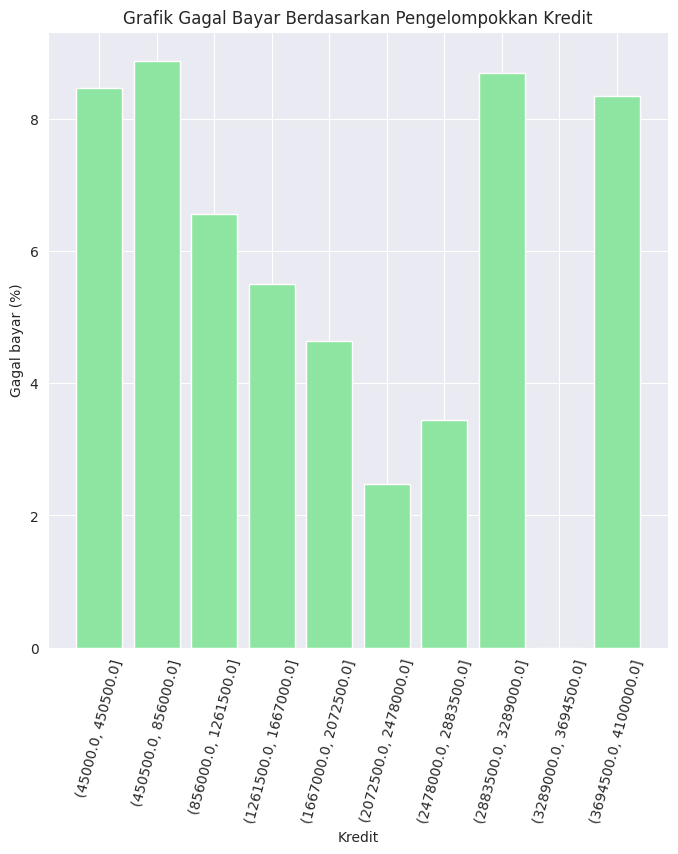

In [ ]:
plt.figure(figsize = (8, 8))
plt.bar(credit_group.index.astype(str), 100 * credit_group['TARGET'], color='g')

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Kredit'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Kredit')

Kelompok kredit dengan rentang (45000.0, 450500.0) memiliki persentase gagal bayar sekitar 8.46%, sedangkan kelompok kredit dengan rentang (450500.0, 856000.0) memiliki persentase gagal bayar sekitar 8.87%.

Secara umum, persentase gagal bayar cenderung menurun seiring dengan peningkatan jumlah kredit. Kelompok kredit dengan rentang (3694500.0, 4100000.0) memiliki persentase gagal bayar sekitar 8.33%, sedangkan kelompok kredit dengan rentang (2072500.0, 2478000.0) memiliki persentase gagal bayar sekitar 2.47%.

Terdapat satu kelompok kredit dengan rentang (3289000.0, 3694500.0) yang memiliki persentase gagal bayar sebesar 0%. Ini berarti tidak ada kejadian gagal bayar dalam kelompok kredit tersebut.

## Distribusi Days from Birth

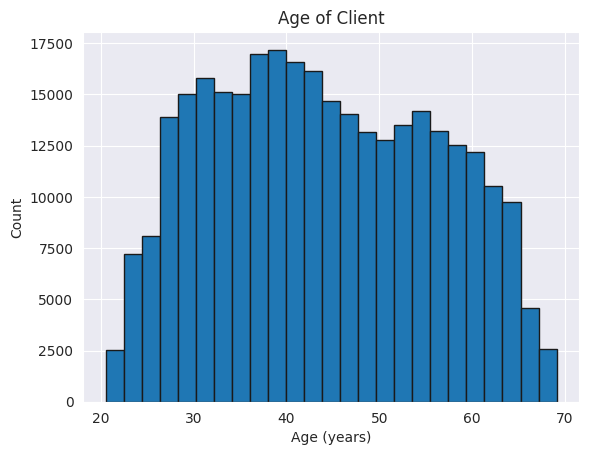

In [ ]:
# Gaali usia pada data
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])

# Plot distribusi usia dalam tahun
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
# Informasi umur ke dalam dataframe terpisah
age = train_data[['TARGET', 'DAYS_BIRTH']]
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / 365

# Kelompokkan data umur
age['YEARS_BINNED'] = pd.cut(age['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


* Kolom 'TARGET' merupakan variabel target yang menunjukkan risiko kredit yang tinggi atau rendah dari loans.
* Kolom 'DAYS_BIRTH' merupakan jumlah hari sejak tanggal lahir peminjam.
* Kolom 'YEARS_BIRTH' merupakan usia peminjam dalam tahun, dihitung dengan membagi 'DAYS_BIRTH' dengan 365.
* Kolom 'YEARS_BINNED' merupakan pengelompokan usia peminjam ke dalam beberapa kategori, dengan menggunakan metode pembagian bin (binning). Kategori usia dibuat dengan rentang 5 tahun, mulai dari 20 tahun hingga 70 tahun.

* Pada baris pertama, peminjam memiliki nilai 'TARGET' = 1, artinya mereka memiliki risiko kredit yang tinggi.
* Usia peminjam dihitung dalam tahun ('YEARS_BIRTH'), dan dalam contoh ini peminjam pertama memiliki usia sekitar 25 tahun.
* Usia peminjam kemudian dikategorikan dalam rentang usia ('YEARS_BINNED'). Peminjam pertama termasuk dalam kategori usia antara 25 hingga 30 tahun.

## Distribusi AMT ANNUITY

Berisi jumlah angsuran yang harus diabayarkan peminjam dalam satu tahun.

In [ ]:
annuity= train_data[['TARGET', 'AMT_ANNUITY']]

# Kelompokkan data AMT_ANNUITY
annuity['AMT_ANNUITY_BINNED'] = pd.cut(annuity['AMT_ANNUITY'], bins = np.linspace(1600, 259000, num = 10))

annuity.head(5)

,TARGET,AMT_ANNUITY,AMT_ANNUITY_BINNED
0,1,24700.5,"(1600.0, 30200.0]"
1,0,35698.5,"(30200.0, 58800.0]"
2,0,6750.0,"(1600.0, 30200.0]"
3,0,29686.5,"(1600.0, 30200.0]"
4,0,21865.5,"(1600.0, 30200.0]"


In [ ]:
# Kelompokkan berdasarkan rentang angsuran dan hitung rata-rata
annuity_group  = annuity.groupby('AMT_ANNUITY_BINNED').mean()
annuity_group

,TARGET,AMT_ANNUITY
AMT_ANNUITY_BINNED,,
"(1600.0, 30200.0]",0.082187,18878.826742
"(30200.0, 58800.0]",0.081123,39832.041921
"(58800.0, 87400.0]",0.047131,66972.765846
"(87400.0, 116000.0]",0.026437,97831.779310
"(116000.0, 144600.0]",0.014599,126411.043796
"(144600.0, 173200.0]",0.035714,153360.642857
"(173200.0, 201800.0]",0.000000,178010.470588
"(201800.0, 230400.0]",0.000000,221277.728571
"(230400.0, 259000.0]",0.000000,258025.500000


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Angsuran')

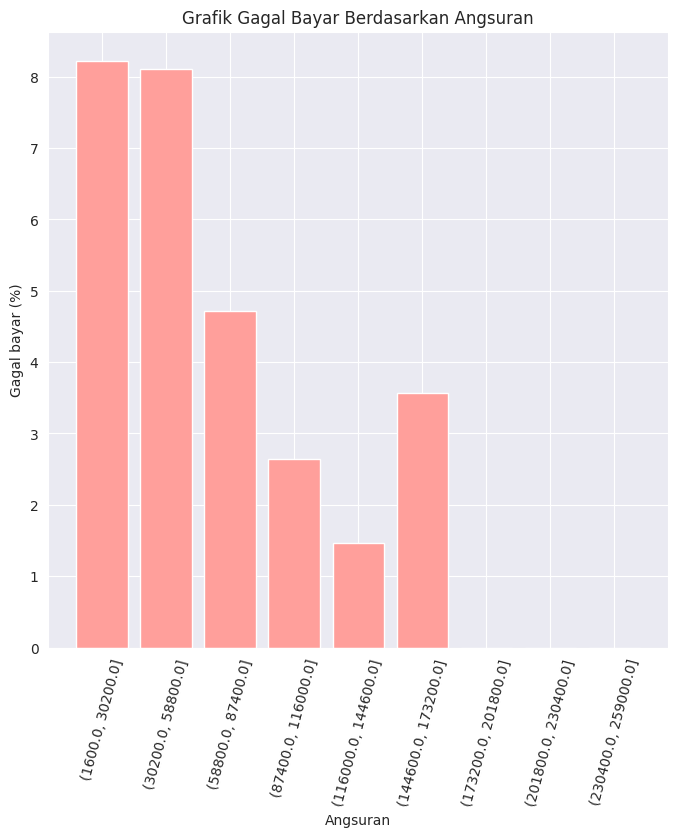

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik angsuran peminjam dan rata-rata target sebagai plot batang
plt.bar(annuity_group.index.astype(str), 100 * annuity_group['TARGET'], color='r')

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Angsuran'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Angsuran')

## Cek Korelasi

In [ ]:
# Hitung matriks korelasi
correlation= train_data.corr()['TARGET'].sort_values()

# Menampilkan Korelasi paling positive dan paling negative
print('Most Positive Correlations:\n', correlation.tail(10))
print('\nMost Negative Correlations:\n', correlation.head(10))

Most Positive Correlations:
 DAYS_REGISTRATION              0.041978
FLAG_DOCUMENT_3                0.044338
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_EMP_PHONE                 0.045985
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055220
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160293
EXT_SOURCE_3                 -0.155898
DAYS_BIRTH                   -0.078244
DAYS_EMPLOYED                -0.044935
AMT_GOODS_PRICE              -0.039625
FLOORSMAX_AVG                -0.039388
FLOORSMAX_MEDI               -0.039159
FLOORSMAX_MODE               -0.038379
REGION_POPULATION_RELATIVE   -0.037225
AMT_CREDIT                   -0.030371
Name: TARGET, dtype: float64


In [ ]:
top_corr_target = correlation[(abs(correlation) > 0.05)]

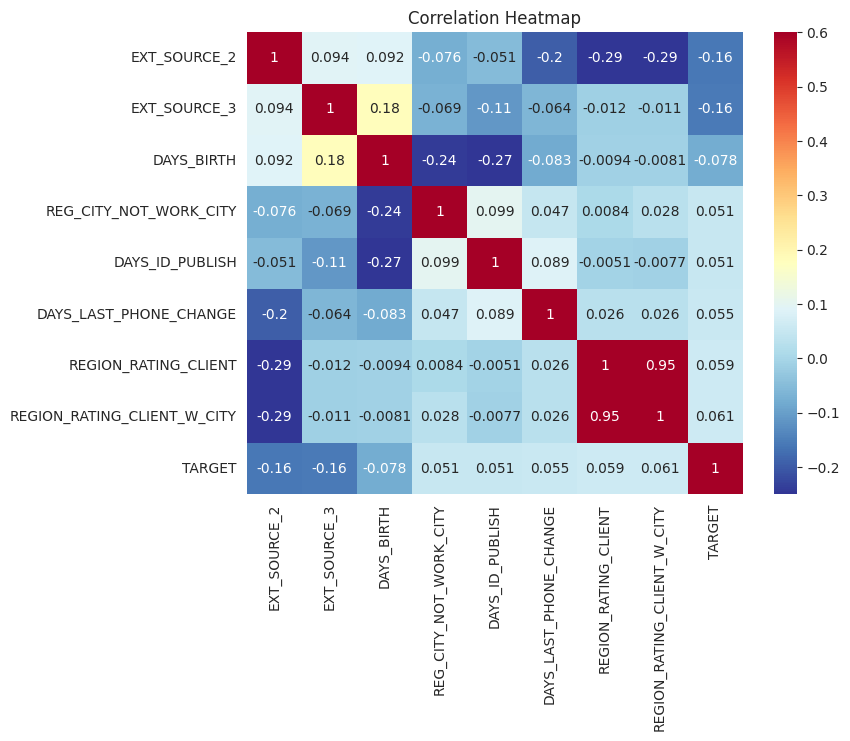

In [ ]:
plt.figure(figsize=(8, 6))

# Memuat matrix korelasi
corrmat= train_data[top_corr_target.index].corr()

# Heatmap dari korelasi
sns.heatmap(corrmat, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


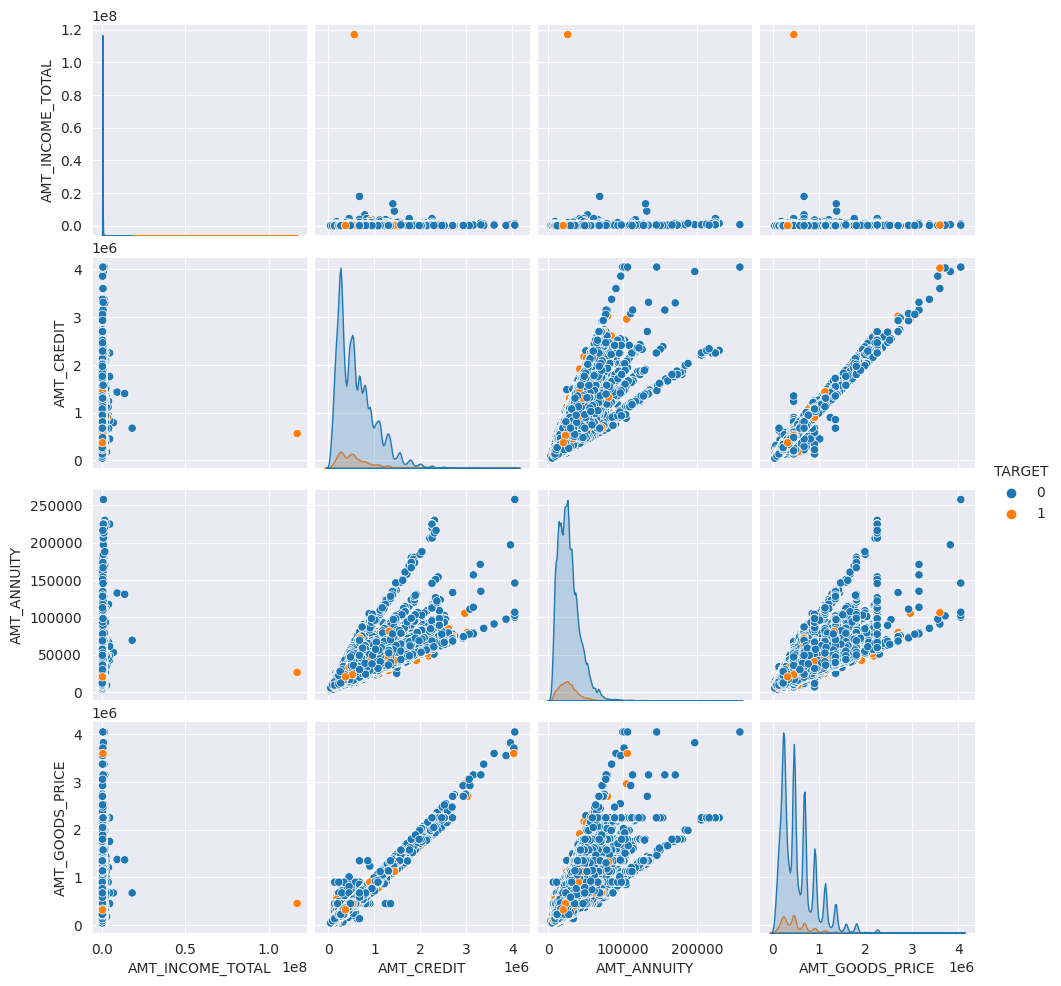

In [ ]:
# Mengambil subset kolom numerik
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']
subset_df = train_data[numeric_cols]

# Membuat pair plot
sns.pairplot(subset_df, hue='TARGET')
plt.show()


# Modelling dan Evaluation

## Encoding

In [ ]:
# melakukan label encoding pada dataset categorical/data yang memiliki tipe data "object"
# Encoding ini dilakukan dengan menggunakan "label encoding"

train_data[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']]= train_data[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']].apply(LabelEncoder().fit_transform)

In [ ]:
train_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = train_data.drop(['TARGET','SK_ID_CURR'],1)
y = train_data['TARGET']

## Feature Selection

Feature selection dilakukan untuk memilih fitur terbaik dari banyak kumpulan fitur pada data. Dengan melakukan feature selection, pada saat modelling dapat meningkatkan akurasi model. Fiture yang akan digunakan adalah **Pearson Correlation**.

In [ ]:
# Hitung matriks korelasi
correlation_target = train_data.corr()['TARGET'].sort_values()
correlation_target

EXT_SOURCE_2                  -0.160293
EXT_SOURCE_3                  -0.155898
DAYS_BIRTH                    -0.078244
DAYS_EMPLOYED                 -0.044935
AMT_GOODS_PRICE               -0.039625
                                 ...   
CODE_GENDER                    0.054711
DAYS_LAST_PHONE_CHANGE         0.055220
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
TARGET                         1.000000
Name: TARGET, Length: 81, dtype: float64

In [ ]:
# Ambang batas untuk korelasi tinggi dan rendah
high_corr_threshold = 0.05

# Memisahkan fitur dengan korelasi tinggi
high_correlation_features = correlation_target[abs(correlation_target) > high_corr_threshold].reset_index()

# Cetak fitur-fitur dengan korelasi tinggi
print("Fitur dengan Korelasi Tinggi:")
print(high_correlation_features)

Fitur dengan Korelasi Tinggi:
                          index    TARGET
0                  EXT_SOURCE_2 -0.160293
1                  EXT_SOURCE_3 -0.155898
2                    DAYS_BIRTH -0.078244
3        REG_CITY_NOT_WORK_CITY  0.050994
4               DAYS_ID_PUBLISH  0.051457
5           NAME_EDUCATION_TYPE  0.054696
6                   CODE_GENDER  0.054711
7        DAYS_LAST_PHONE_CHANGE  0.055220
8          REGION_RATING_CLIENT  0.058901
9   REGION_RATING_CLIENT_W_CITY  0.060895
10                       TARGET  1.000000


In [ ]:
# Membuat data set baru dengan fitur yang memiliki korelasi tinggi dengan target dan menampilkan dalam bentuk data frame
new = pd.DataFrame(train_data,columns=['EXT_SOURCE_2','EXT_SOURCE_3','REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH','CODE_GENDER','NAME_EDUCATION_TYPE','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','DAYS_BIRTH','TARGET'])
new.head()

,EXT_SOURCE_2,EXT_SOURCE_3,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER,NAME_EDUCATION_TYPE,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,DAYS_BIRTH,TARGET
0,0.262949,0.139376,0,-2120,1,4,-1134.0,2,9461,1
1,0.622246,0.535276,0,-291,0,1,-828.0,1,16765,0
2,0.555912,0.729567,0,-2531,1,4,-815.0,2,19046,0
3,0.650442,0.535276,0,-2437,0,4,-617.0,2,19005,0
4,0.322738,0.535276,1,-3458,1,4,-1106.0,2,19932,0


## Imbalance Data

In [ ]:
# create two different dataframe of fraud and nonfraud class
fraud = train_data[(train_data['TARGET']==0)]
nonfraud = train_data[(train_data['TARGET']==1)]

# upsample nonfraud class
nonfraud_upsampled = resample(nonfraud,
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match nonfraud class
                                 random_state=0)  # reproducible results

# combine fraudclass with upsampled minority class
train_data_upsampled = pd.concat([nonfraud_upsampled, fraud])

In [ ]:
train_data_upsampled['TARGET'].value_counts()

1    282686
0    282680
Name: TARGET, dtype: int64

In [ ]:
x = train_data_upsampled.drop(['TARGET','SK_ID_CURR'],1)
y = train_data_upsampled['TARGET']

## Splitting

In [ ]:
# splitting tha data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(395756, 79) (395756,)
(169610, 79) (169610,)


## Modelling

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit the model
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

# Make the predictions
y_predlr= logreg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_test, y_predlr))
print("Accuracy Score :")
print(accuracy_score(y_test,y_predlr))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_predlr))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_predlr))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.58      0.61      0.59     85101
           1       0.58      0.55      0.56     84509

    accuracy                           0.58    169610
   macro avg       0.58      0.58      0.58    169610
weighted avg       0.58      0.58      0.58    169610

Accuracy Score :
0.5790755262071812
Confusion matrix :
[[52046 33055]
 [38338 46171]]
ROC AUC score is:  0.5789616793715999


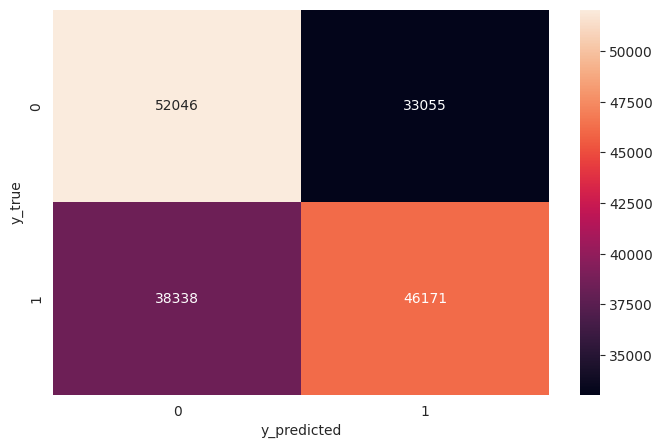

In [ ]:
figure, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predlr), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model
ranfor = RandomForestClassifier(random_state=0)
ranfor.fit(x_train, y_train)

# Make the predictions
y_ranfor= ranfor.predict(x_test)

In [ ]:
# print classification report
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_test, y_ranfor))
print("Accuracy Score :")
print(accuracy_score(y_test,y_ranfor))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_ranfor))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_ranfor))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85101
           1       0.99      1.00      1.00     84509

    accuracy                           1.00    169610
   macro avg       1.00      1.00      1.00    169610
weighted avg       1.00      1.00      1.00    169610

Accuracy Score :
0.9970166853369494
Confusion matrix :
[[84614   487]
 [   19 84490]]
ROC AUC score is:  0.9970262799599894


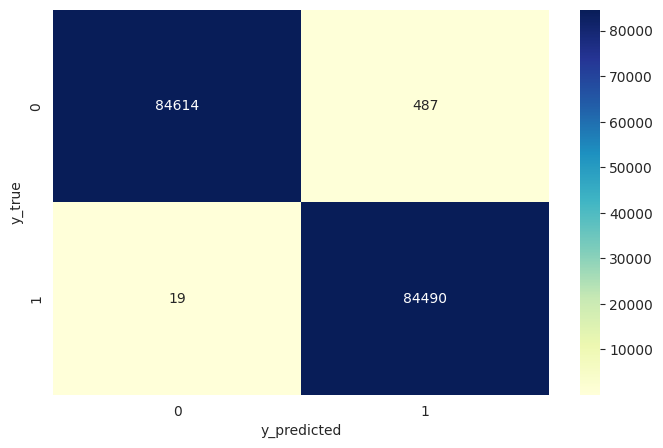

In [ ]:
figure, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_ranfor), annot=True, fmt=".0f", ax=ax,cmap='YlGnBu')
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit the model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Make the predictions
y_dtc= dtc.predict(x_test)

In [ ]:
# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_test, y_dtc))
print("Accuracy Score :")
print(accuracy_score(y_test,y_dtc))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_dtc))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_dtc))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85101
           1       0.90      1.00      0.95     84509

    accuracy                           0.95    169610
   macro avg       0.95      0.95      0.95    169610
weighted avg       0.95      0.95      0.95    169610

Accuracy Score :
0.9457461234597017
Confusion matrix :
[[75918  9183]
 [   19 84490]]
ROC AUC score is:  0.9459340483763417


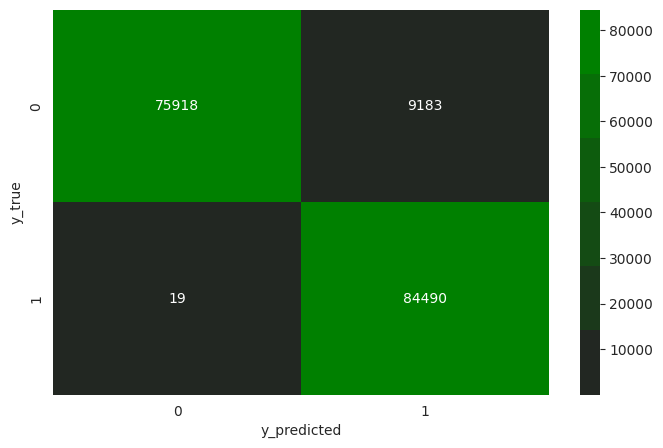

In [ ]:
figure, ax = plt.subplots(figsize=(8,5))
clr=sns.dark_palette('green')
sns.heatmap(confusion_matrix(y_test, y_dtc), annot=True, fmt=".0f", ax=ax,cmap=clr)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Fit model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Make the predictions
y_knn= knn.predict(x_test)

In [ ]:
# print classification report
print('Classification Report Training Model (KNeighborsClassifier):')
print(classification_report(y_test, y_knn))
print("Accuracy Score :")
print(accuracy_score(y_test,y_knn))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_knn))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_knn))

Classification Report Training Model (KNeighborsClassifier):
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     85101
           1       0.78      0.99      0.87     84509

    accuracy                           0.86    169610
   macro avg       0.88      0.86      0.85    169610
weighted avg       0.88      0.86      0.85    169610

Accuracy Score :
0.856594540416249
Confusion matrix :
[[61450 23651]
 [  672 83837]]
ROC AUC score is:  0.8570656779888398


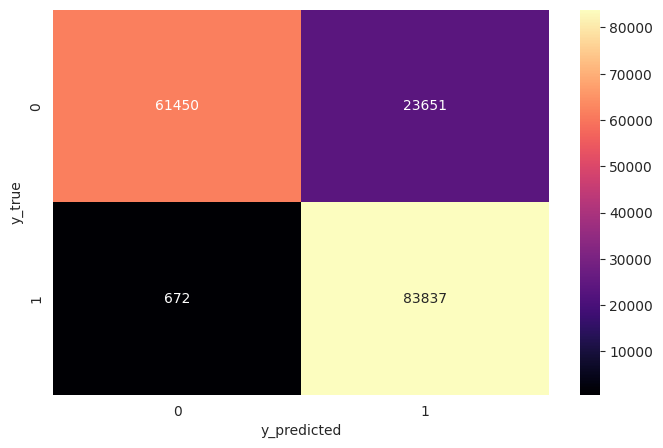

In [ ]:
figure, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_knn), annot=True, fmt=".0f", ax=ax,cmap='magma')
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.show()

## Model Selection

## Evaluasi Model

In [ ]:
lr_accuracy = accuracy_score(y_test,y_predlr)*100  #dalam persen
rfc_accuracy = accuracy_score(y_test,y_ranfor)*100
dtc_accuracy = accuracy_score(y_test,y_dtc)*100
knn_accuracy = accuracy_score(y_test,y_knn)*100

In [ ]:
from sklearn.metrics import precision_score

lr_precision = precision_score(y_true=y_test, y_pred=y_predlr, average='macro')*100
rfc_precision = precision_score(y_true=y_test, y_pred=y_ranfor, average='macro')*100
dtc_precision = precision_score(y_true=y_test, y_pred=y_dtc, average='macro')*100
knn_precision = precision_score(y_true=y_test, y_pred=y_knn, average='macro')*100

In [ ]:
from sklearn.metrics import recall_score
lr_recall = recall_score(y_true=y_test, y_pred=y_predlr, average='macro')*100
rfc_recall = recall_score(y_true=y_test, y_pred=y_ranfor, average='macro')*100
dtc_recall = recall_score(y_true=y_test, y_pred=y_dtc, average='macro')*100
knn_recall = recall_score(y_true=y_test, y_pred=y_knn, average='macro')*100

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
ROC_AUC_lr = roc_auc_score(y_test,y_predlr)
ROC_AUC_rf = roc_auc_score(y_test,y_ranfor)
ROC_AUC_dtc = roc_auc_score(y_test,y_dtc)
ROC_AUC_knn = roc_auc_score(y_test,y_knn)

In [ ]:
# membuat dataframe train_data_eval yang berisi nilai akurasi, presisi, dan recall dari empat model klasifikasi: Logistic Regression, Random Forest Classifier, Gaussian NB, Decision Tree, dan KNN.
# Setiap model memiliki empat metrik evaluasi performa yang diukur, yaitu accuracy (akurasi), precision (presisi), recall, dan ROC_AUC.
train_data_eval = pd.DataFrame({
    'Logistic Regression' :[lr_accuracy, lr_precision, lr_recall, ROC_AUC_lr],
    'Random Forest Classifier' :[rfc_accuracy, rfc_precision, rfc_recall, ROC_AUC_rf],
    'Decision Tree Classifier' :[dtc_accuracy, dtc_precision, dtc_recall, ROC_AUC_dtc],
    'KNN' :[knn_accuracy, knn_precision, knn_recall, ROC_AUC_knn]
    },
    index=['Accuracy','Precision','Recall','ROU_AUC'])

train_data_eval

,Logistic Regression,Random Forest Classifier,Decision Tree Classifier,KNN
Accuracy,57.907553,99.701669,94.493839,85.659454
Precision,57.930393,99.702227,95.019283,88.457436
Recall,57.896168,99.702628,94.512900,85.706568
ROU_AUC,0.578962,0.997026,0.945129,0.857066
